In [249]:
#Computation and Visualisation packages
library(PerformanceAnalytics)
library(psych)
library(ggplot2)
library(GGally)
library(factoextra)
library(corrplot)
library(gridExtra)
library(caret)
library(e1071)
library(highcharter)
library(reshape2)
library(dplyr)
library(stringr)

# Suppress warnings
options(warn=-1)

In [250]:
#Loading the dataset
data <- read.csv('supervised_breast_cancer.csv', header=TRUE, stringsAsFactor=FALSE)
#Preprocessing
data$X <- NULL
data <- data[,-1]
data$diagnosis <- factor(ifelse(data$diagnosis=="B","Benign","Malignant"))

## Inspecting the data

In [251]:
str(data)

'data.frame':	569 obs. of  31 variables:
 $ diagnosis              : Factor w/ 2 levels "Benign","Malignant": 2 2 2 2 2 2 2 2 2 2 ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
 $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
 

In [252]:
head(data)
tail(data)

diagnosis radius_mean texture_mean perimeter_mean area_mean smoothness_mean
1 Malignant 17.99       10.38        122.80         1001.0    0.11840        
2 Malignant 20.57       17.77        132.90         1326.0    0.08474        
3 Malignant 19.69       21.25        130.00         1203.0    0.10960        
4 Malignant 11.42       20.38         77.58          386.1    0.14250        
5 Malignant 20.29       14.34        135.10         1297.0    0.10030        
6 Malignant 12.45       15.70         82.57          477.1    0.12780        
  compactness_mean concavity_mean concave.points_mean symmetry_mean ⋯
1 0.27760          0.3001         0.14710             0.2419        ⋯
2 0.07864          0.0869         0.07017             0.1812        ⋯
3 0.15990          0.1974         0.12790             0.2069        ⋯
4 0.28390          0.2414         0.10520             0.2597        ⋯
5 0.13280          0.1980         0.10430             0.1809        ⋯
6 0.17000          0.1578         0.08089             0.2087        ⋯
  radius_worst texture_worst perimeter_worst area_worst smoothness_worst
1 25.38        17.33         184.60          2019.0     0.1622          
2 24.99        23.41         158.80          1956.0     0.1238          
3 23.57        25.53         152.50          1709.0     0.1444          
4 14.91        26.50          98.87           567.7     0.2098          
5 22.54        16.67         152.20          1575.0     0.1374          
6 15.47        23.75         103.40           741.6     0.1791          
  compactness_worst concavity_worst concave.points_worst symmetry_worst
1 0.6656            0.7119          0.2654               0.4601        
2 0.1866            0.2416          0.1860               0.2750        
3 0.4245            0.4504          0.2430               0.3613        
4 0.8663            0.6869          0.2575               0.6638        
5 0.2050            0.4000          0.1625               0.2364        
6 0.5249            0.5355          0.1741               0.3985        
  fractal_dimension_worst
1 0.11890                
2 0.08902                
3 0.08758                
4 0.17300                
5 0.07678                
6 0.12440

diagnosis radius_mean texture_mean perimeter_mean area_mean smoothness_mean
564 Malignant 20.92       25.09        143.00         1347.0    0.10990        
565 Malignant 21.56       22.39        142.00         1479.0    0.11100        
566 Malignant 20.13       28.25        131.20         1261.0    0.09780        
567 Malignant 16.60       28.08        108.30          858.1    0.08455        
568 Malignant 20.60       29.33        140.10         1265.0    0.11780        
569 Benign     7.76       24.54         47.92          181.0    0.05263        
    compactness_mean concavity_mean concave.points_mean symmetry_mean ⋯
564 0.22360          0.31740        0.14740             0.2149        ⋯
565 0.11590          0.24390        0.13890             0.1726        ⋯
566 0.10340          0.14400        0.09791             0.1752        ⋯
567 0.10230          0.09251        0.05302             0.1590        ⋯
568 0.27700          0.35140        0.15200             0.2397        ⋯
569 0.04362          0.00000        0.00000             0.1587        ⋯
    radius_worst texture_worst perimeter_worst area_worst smoothness_worst
564 24.290       29.41         179.10          1819.0     0.14070         
565 25.450       26.40         166.10          2027.0     0.14100         
566 23.690       38.25         155.00          1731.0     0.11660         
567 18.980       34.12         126.70          1124.0     0.11390         
568 25.740       39.42         184.60          1821.0     0.16500         
569  9.456       30.37          59.16           268.6     0.08996         
    compactness_worst concavity_worst concave.points_worst symmetry_worst
564 0.41860           0.6599          0.2542               0.2929        
565 0.21130           0.4107          0.2216               0.2060        
566 0.19220           0.3215          0.1628               0.2572        
567 0.30940           0.3403          0.1418               0.2218        
568 0.86810           0.9387          0.2650               0.4087        
569 0.06444           0.0000          0.0000               0.2871        
    fractal_dimension_worst
564 0.09873                
565 0.07115                
566 0.06637                
567 0.07820                
568 0.12400                
569 0.07039

In [253]:
summary(data)

     diagnosis    radius_mean      texture_mean   perimeter_mean  
 Benign   :357   Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Malignant:212   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
                 Median :13.370   Median :18.84   Median : 86.24  
                 Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                 3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                 Max.   :28.110   Max.   :39.28   Max.   :188.50  
   area_mean      smoothness_mean   compactness_mean  concavity_mean   
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
 concave.points_mean symmet

## Analyzing Correlation between variables

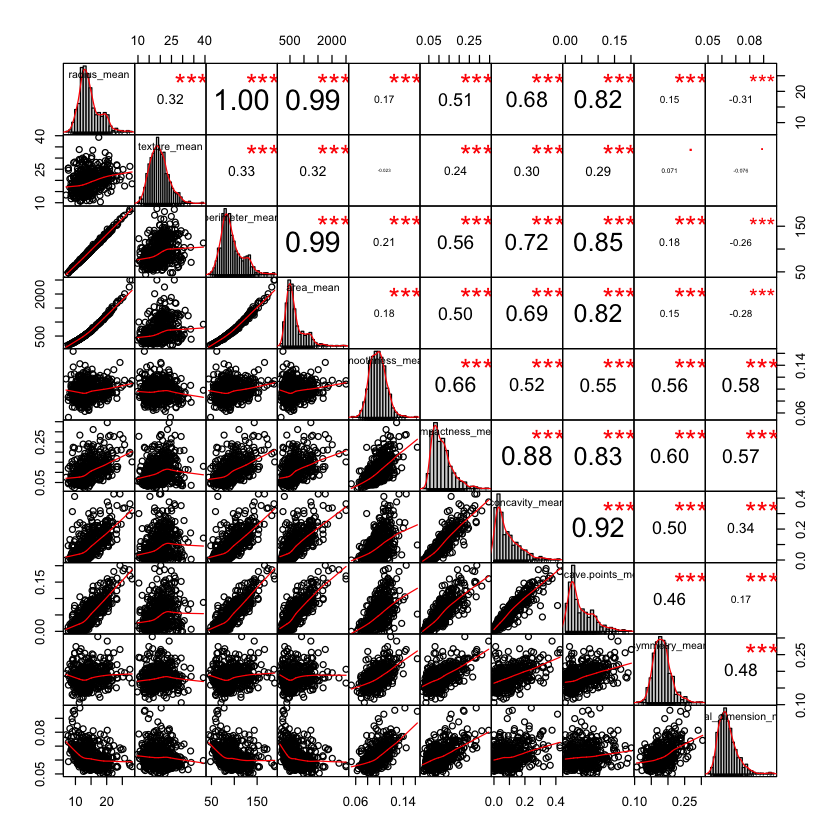

In [254]:
# Using Mean
chart.Correlation(data[, c(2:11)], histogram=TRUE, col="grey10", pch=1, main="Cancer Mean")

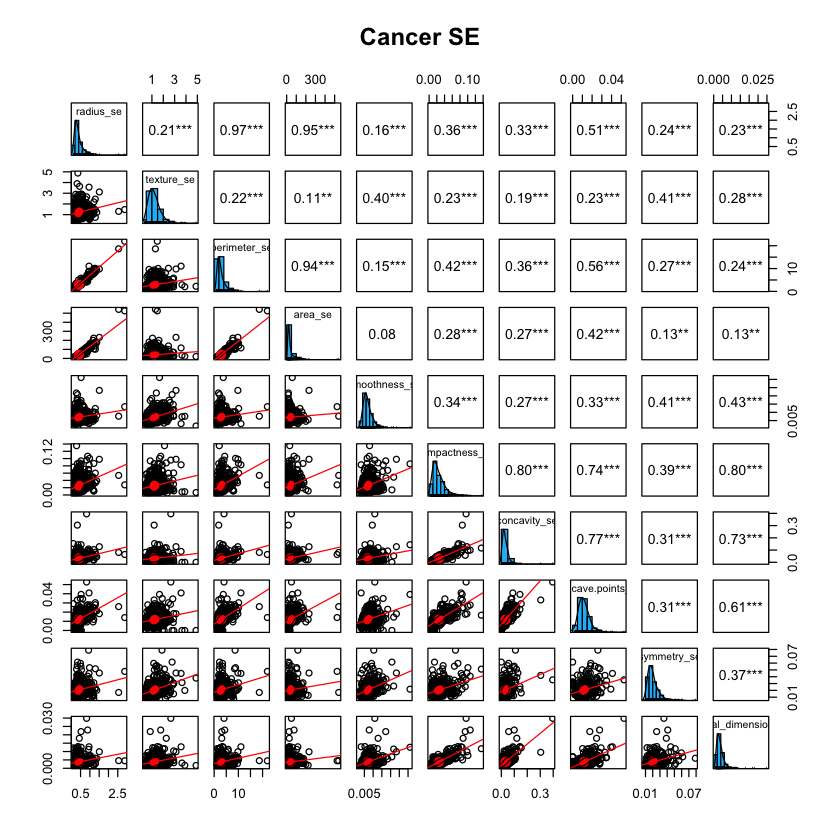

In [255]:
# Using Standard Error
pairs.panels(data[,c(12:21)], method="pearson", hist.col = "#1fbbfa", density=TRUE, ellipses=TRUE, show.points = TRUE, 
             pch=1, lm=TRUE, cex.cor=1, smoother=F, stars = T, main="Cancer SE")

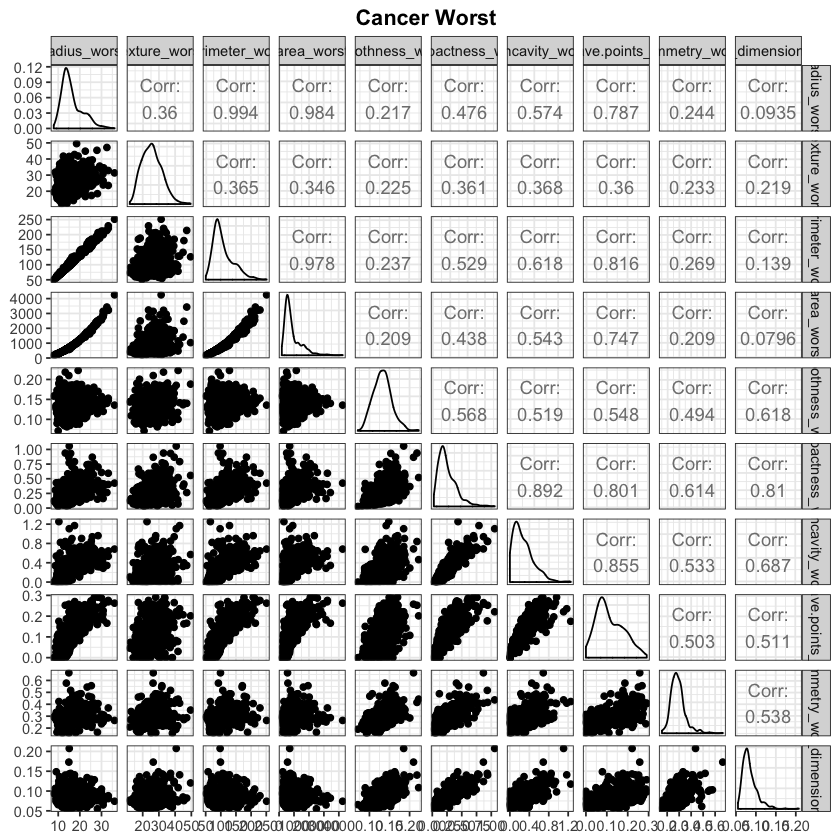

In [256]:
# Using Worst
ggpairs(data[,c(22:31)],)+ theme_bw()+
labs(title="Cancer Worst")+
theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=13))

# Relation between each variables

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


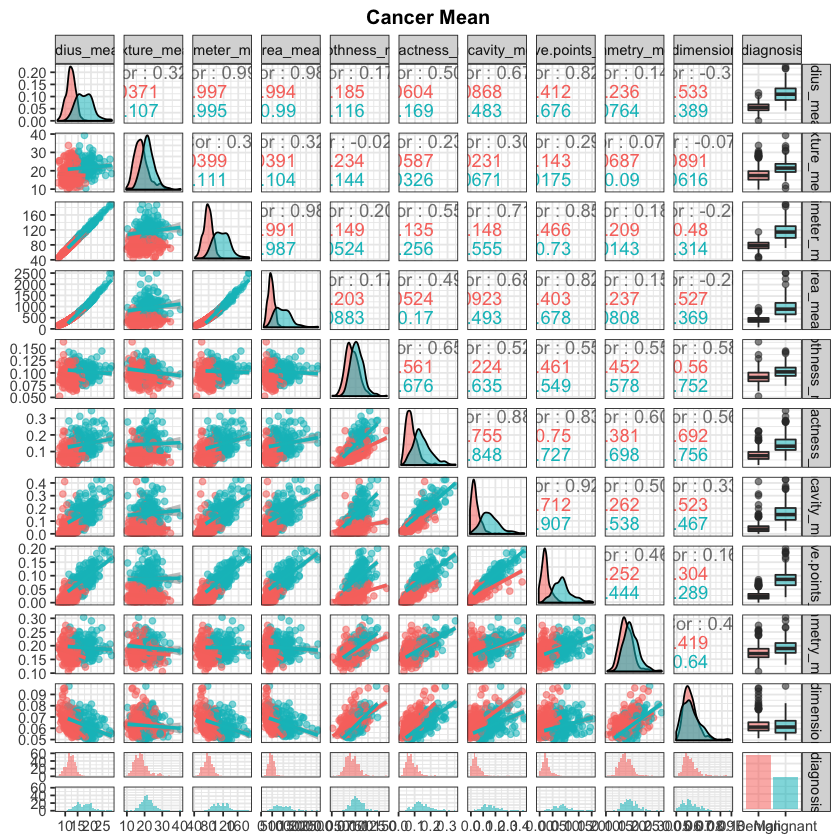

In [257]:
# Using mean
ggpairs(data[,c(2:11,1)], aes(color=diagnosis, alpha=0.75), lower=list(continuous="smooth")) + 
    theme_bw()+
    labs(title="Cancer Mean")+
    theme(plot.title=element_text(face='bold', color='black', hjust=0.5, size=12))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


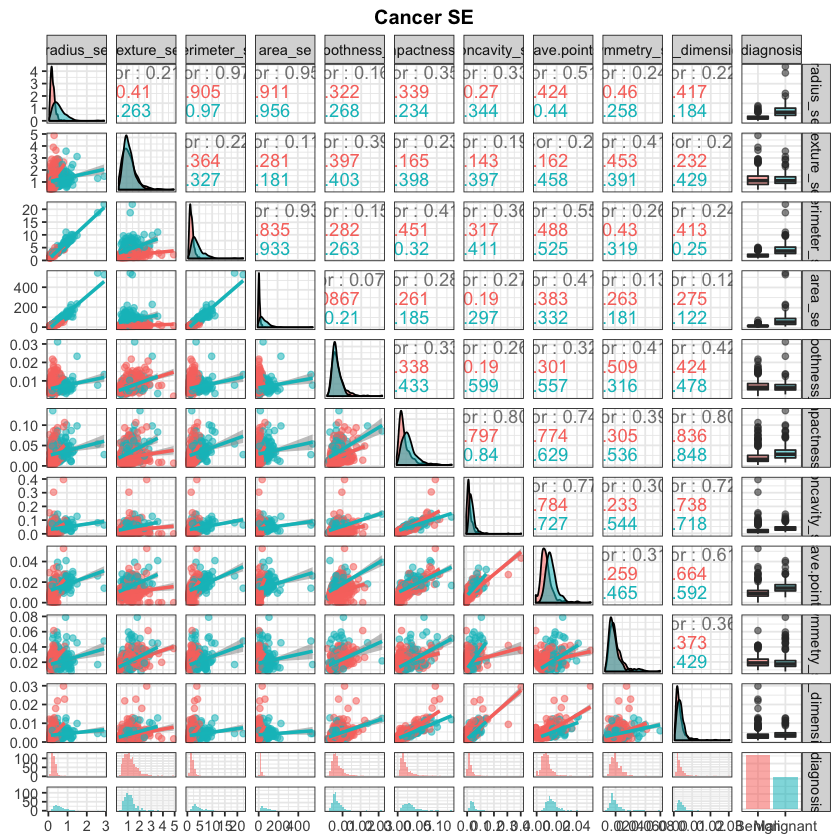

In [258]:
#Using standard error
ggpairs(data[,c(12:21,1)], aes(color=diagnosis, alpha=0.75), lower=list(continuous="smooth"))+ theme_bw()+
labs(title="Cancer SE")+
theme(plot.title=element_text(face='bold', color='black', hjust=0.5, size=12))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


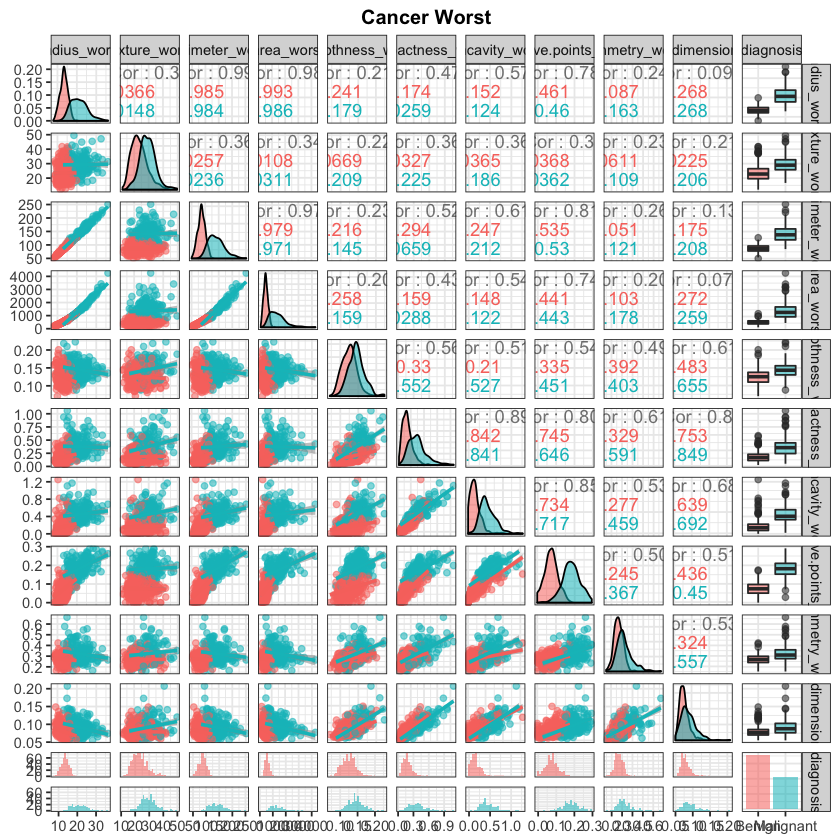

In [259]:
# Using worst
ggpairs(data[,c(22:31,1)], aes(color=diagnosis, alpha=0.75), lower=list(continuous="smooth"))+ theme_bw()+
labs(title="Cancer Worst")+
theme(plot.title=element_text(face='bold', color='black', hjust=0.5, size=12))

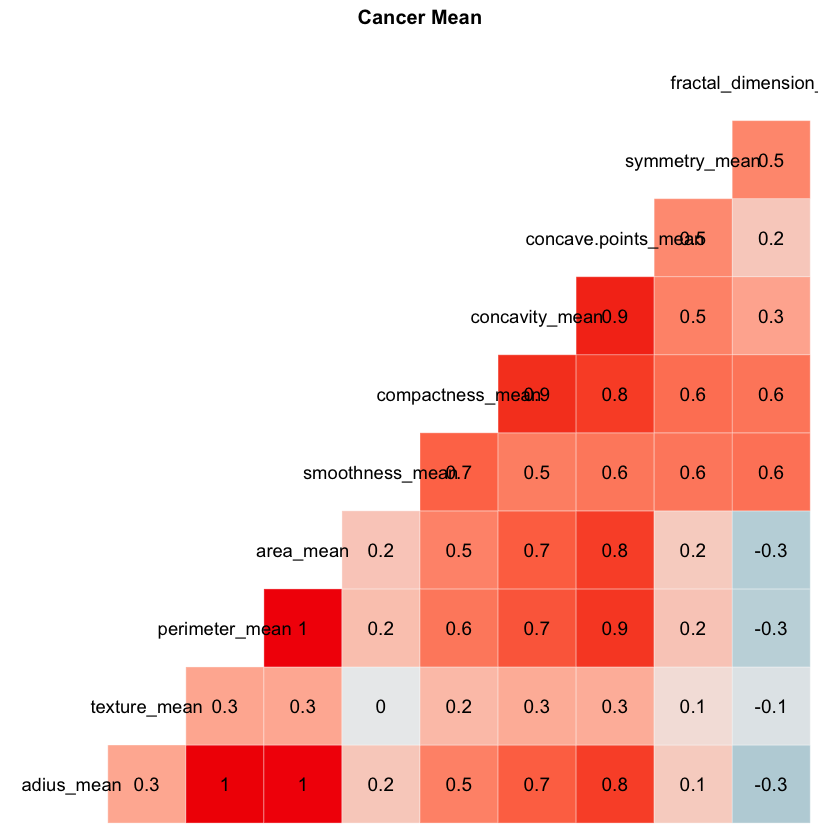

In [260]:
## Using ggcorr plot to view the correlations between the variables
ggcorr(data[,c(2:11)], name = "corr", label = TRUE)+
    theme(legend.position="none")+
    labs(title="Cancer Mean")+
    theme(plot.title=element_text(face='bold', color='black', hjust=0.5, size=12))

# Principal Component Analysis (PCA)

In [261]:
data_pca <- transform(data) 
data_pca <- prcomp(data_pca[,-1], scale = TRUE)

In [262]:
# PCA Summary
summary(data_pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6444 2.3857 1.67867 1.40735 1.28403 1.09880 0.82172
Proportion of Variance 0.4427 0.1897 0.09393 0.06602 0.05496 0.04025 0.02251
Cumulative Proportion  0.4427 0.6324 0.72636 0.79239 0.84734 0.88759 0.91010
                           PC8    PC9    PC10   PC11    PC12    PC13    PC14
Standard deviation     0.69037 0.6457 0.59219 0.5421 0.51104 0.49128 0.39624
Proportion of Variance 0.01589 0.0139 0.01169 0.0098 0.00871 0.00805 0.00523
Cumulative Proportion  0.92598 0.9399 0.95157 0.9614 0.97007 0.97812 0.98335
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.30681 0.28260 0.24372 0.22939 0.22244 0.17652 0.1731
Proportion of Variance 0.00314 0.00266 0.00198 0.00175 0.00165 0.00104 0.0010
Cumulative Proportion  0.98649 0.98915 0.99113 0.99288 0.99453 0.99557 0.9966
                          PC22    PC23   PC24 

## Using Screeplot to understand variability percentage

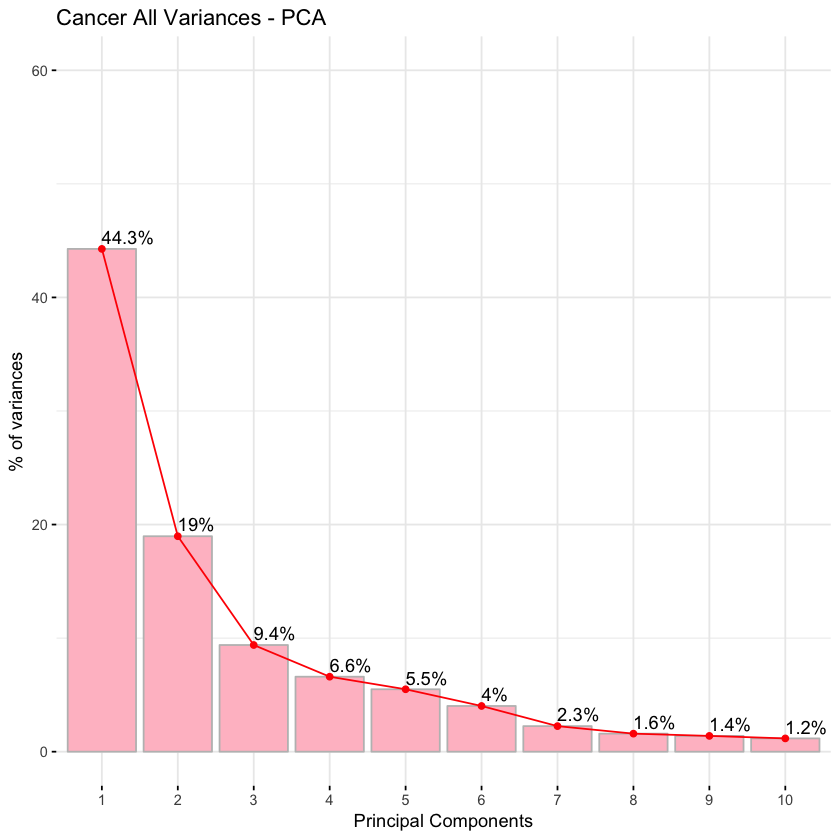

In [263]:
fviz_eig(data_pca, addlabels=TRUE, ylim=c(0,60), geom = c("bar", "line"), barfill = "pink", barcolor="grey", 
         linecolor = "red", ncp=10) +
labs(title = "Cancer All Variances - PCA", x = "Principal Components", y = "% of variances")

# Understanding correlation between the dataset variables and PCA

In [264]:
all_var <- get_pca_var(data_pca)
print (all_var)

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               


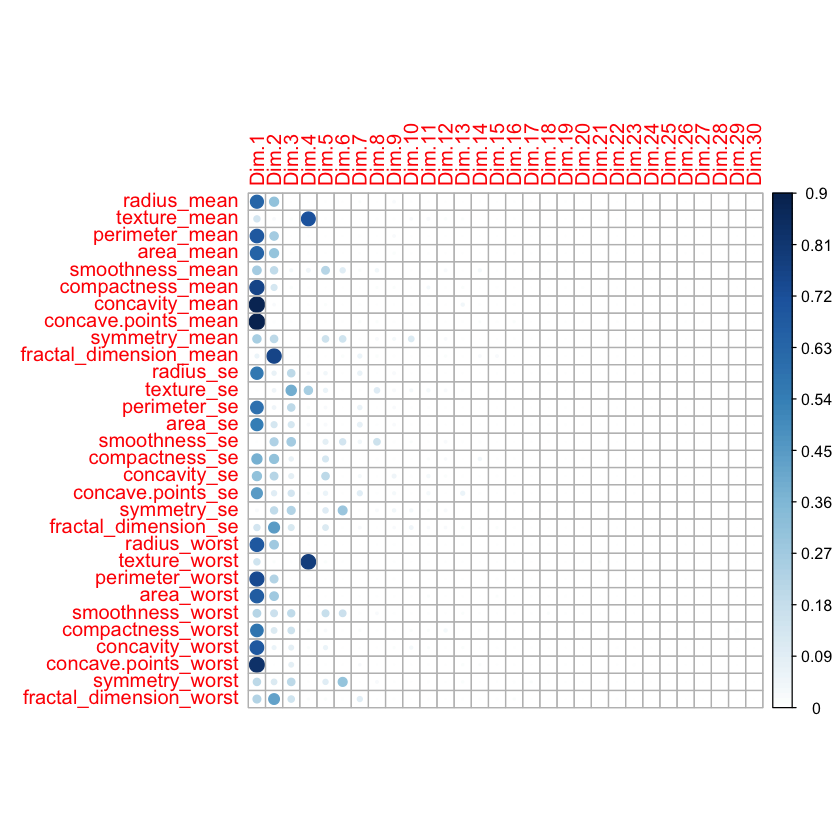

In [265]:
# Correlation between variables and PCA
corrplot(all_var$cos2, is.corr=FALSE)

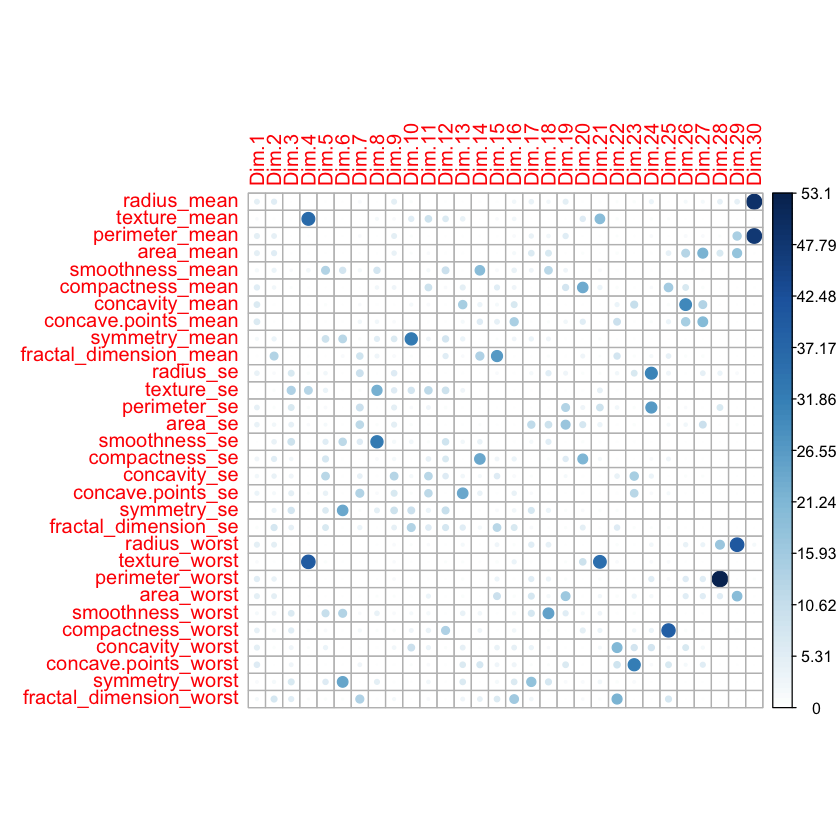

In [266]:
# Understanding into most contributing variables for each components
corrplot(all_var$contrib, is.corr=FALSE)

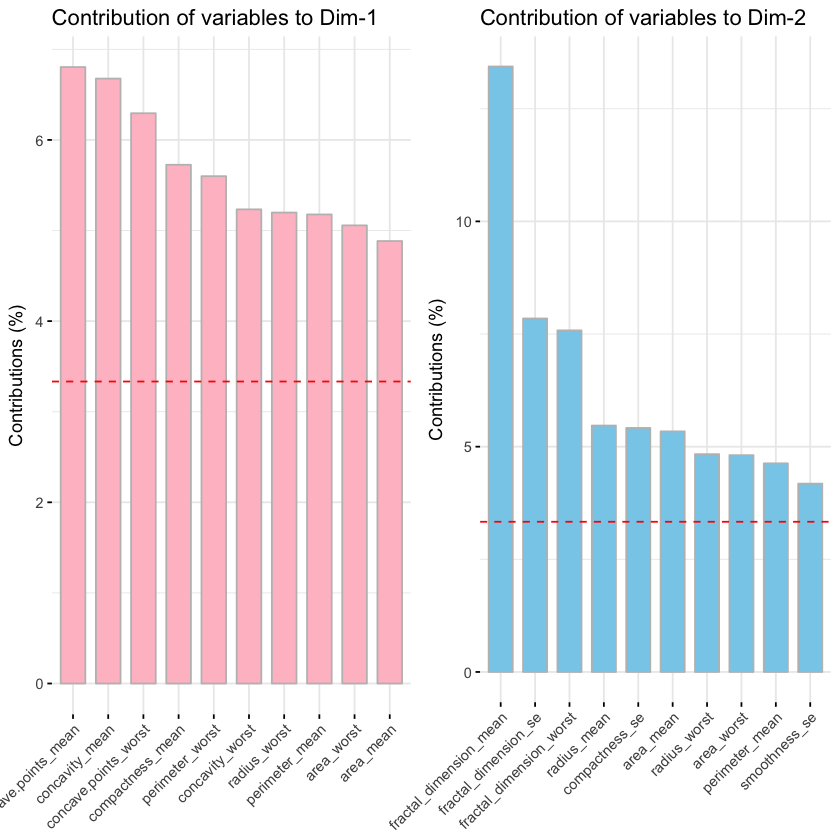

In [267]:
# Contribution of variables to PC1 and PC2
p1 <- fviz_contrib(data_pca, choice="var", axes=1, fill="pink", color="grey", top=10)
p2 <- fviz_contrib(data_pca, choice="var", axes=2, fill="skyblue", color="grey", top=10)
grid.arrange(p1,p2,ncol=2)

## Uniplot of variables by group

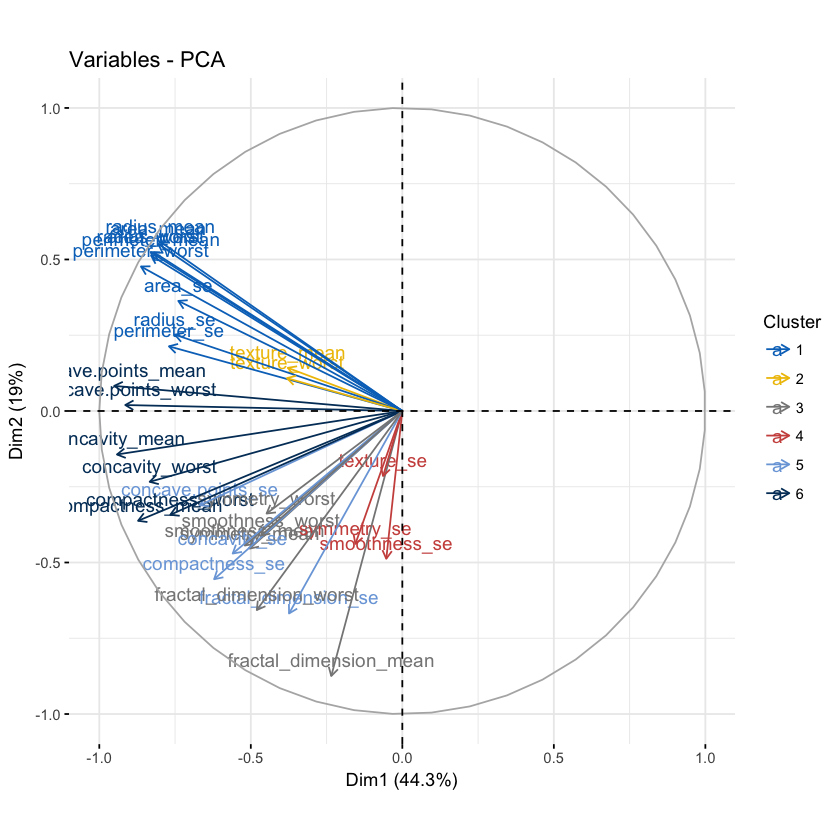

In [268]:
set.seed(218)
res.all <- kmeans(all_var$coord, centers = 6, nstart = 25)
grp <- as.factor(res.all$cluster)

fviz_pca_var(data_pca, col.var = grp, palette = "jco", legend.title = "Cluster")

## Biplot

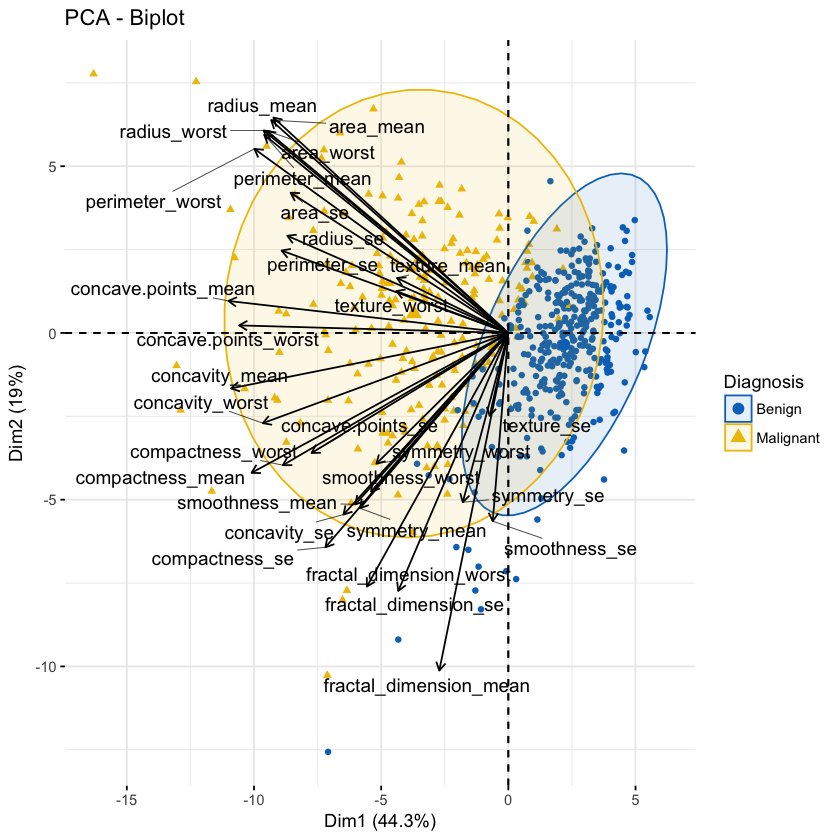

In [269]:
fviz_pca_biplot(data_pca, col.ind = data$diagnosis, col="black", palette = "jco", geom = "point", repel=TRUE, 
                legend.title="Diagnosis", addEllipses = TRUE)

# Building SVM Tune binary classifier model

In [270]:
nrows <- NROW(data)
set.seed(218)                       
index <- sample(1:nrows, 0.8 * nrows) 
train <- data[index,]                   
test <- data[-index,]                   

In [271]:
# Proportion between Benign & Malignant on train data
prop.table(table(train$diagnosis))


   Benign Malignant 
 0.632967  0.367033 

In [272]:
# Proportion between Benign & Malignant on train data
prop.table(table(test$diagnosis))


   Benign Malignant 
0.6052632 0.3947368 

## Building SVM-Tune binary classifier

In [273]:
gamma <- seq(0,0.1,0.005)
cost <- 2^(0:5)
parms <- expand.grid(cost=cost, gamma=gamma)    ## 231

acc_test <- numeric()
accuracy1 <- NULL; accuracy2 <- NULL

for(i in 1:NROW(parms)){        
        learn_svm <- svm(diagnosis~., data=train, gamma=parms$gamma[i], cost=parms$cost[i])
        pre_svm <- predict(learn_svm, test[,-1])
        accuracy1 <- confusionMatrix(pre_svm, test$diagnosis)
        accuracy2[i] <- accuracy1$overall[1]
}

acc <- data.frame(p= seq(1,NROW(parms)), cnt = accuracy2)

opt_p <- subset(acc, cnt==max(cnt))[1,]
sub <- paste("Optimal number of parameter is", opt_p$p, "(accuracy :", opt_p$cnt,") in SVM")


hchart(acc, 'line', hcaes(p, cnt)) %>%
  hc_title(text = "Accuracy With Varying Parameters (SVM)") %>%
  hc_subtitle(text = sub) %>%
  hc_add_theme(hc_theme_google()) %>%
  hc_xAxis(title = list(text = "Number of Parameters")) %>%
  hc_yAxis(title = list(text = "Accuracy"))

HTML widgets cannot be represented in plain text (need html)

In [274]:
# Building SVM-Tune binary classifier
learn_svm <- svm(diagnosis~., data=train, cost=parms$cost[opt_p$p], gamma=parms$gamma[opt_p$p])
pre_svm <- predict(learn_svm, test[,-1])
cm_svm <- confusionMatrix(pre_svm, test$diagnosis)
cm_svm

Confusion Matrix and Statistics

           Reference
Prediction  Benign Malignant
  Benign        69         3
  Malignant      0        42
                                         
               Accuracy : 0.9737         
                 95% CI : (0.925, 0.9945)
    No Information Rate : 0.6053         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.9443         
 Mcnemar's Test P-Value : 0.2482         
                                         
            Sensitivity : 1.0000         
            Specificity : 0.9333         
         Pos Pred Value : 0.9583         
         Neg Pred Value : 1.0000         
             Prevalence : 0.6053         
         Detection Rate : 0.6053         
   Detection Prevalence : 0.6316         
      Balanced Accuracy : 0.9667         
                                         
       'Positive' Class : Benign         
                                         

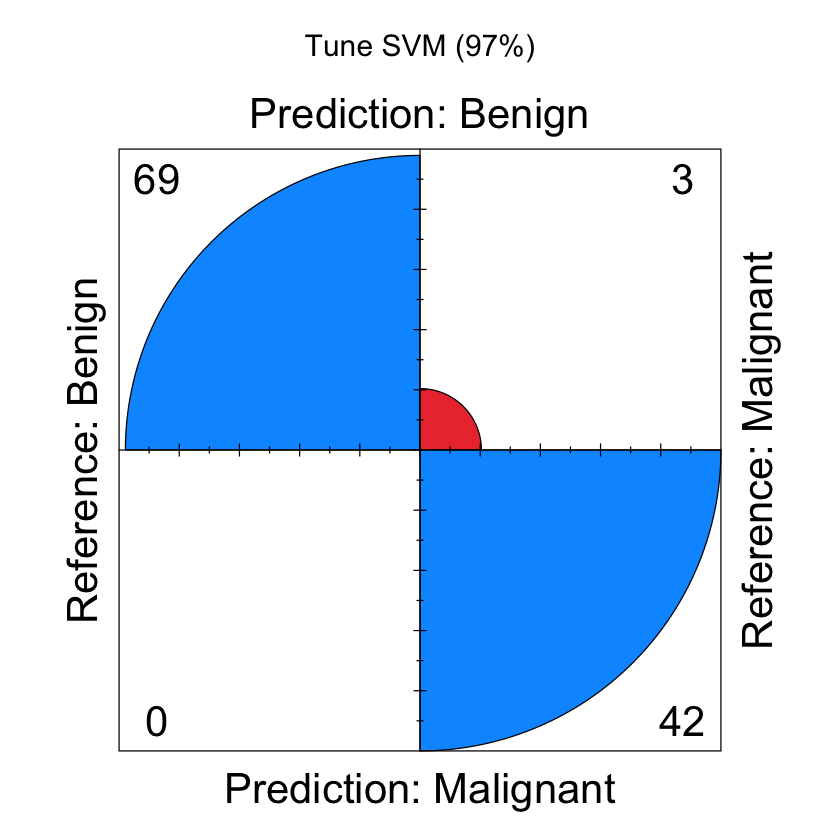

In [275]:
# Accuracy of the model
fourfoldplot(cm_svm$table, color = c("#ed3b3b", "#0099ff"), conf.level = 0, margin = 1, 
             main=paste("Tune SVM (",round(cm_svm$overall[1]*100),"%)",sep=""))

## Testing the classifier model on the test data

In [276]:
cancer_diagnosis_predict <- function(new, method=learn_svm) {
    new_pre <- predict(method, new[,-1])
    new_res <- as.character(new_pre)
    return(paste("Patient ID: ",new[,1],"  =>  Result: ", new_res, sep=""))
}

In [277]:
head (test)

diagnosis radius_mean texture_mean perimeter_mean area_mean smoothness_mean
7  Malignant 18.25       19.98        119.60         1040.0    0.09463        
10 Malignant 12.46       24.04         83.97          475.9    0.11860        
20 Benign    13.54       14.36         87.46          566.3    0.09779        
25 Malignant 16.65       21.38        110.00          904.6    0.11210        
26 Malignant 17.14       16.40        116.00          912.7    0.11860        
34 Malignant 19.27       26.47        127.90         1162.0    0.09401        
   compactness_mean concavity_mean concave.points_mean symmetry_mean ⋯
7  0.10900          0.11270        0.07400             0.1794        ⋯
10 0.23960          0.22730        0.08543             0.2030        ⋯
20 0.08129          0.06664        0.04781             0.1885        ⋯
25 0.14570          0.15250        0.09170             0.1995        ⋯
26 0.22760          0.22290        0.14010             0.3040        ⋯
34 0.17190          0.16570        0.07593             0.1853        ⋯
   radius_worst texture_worst perimeter_worst area_worst smoothness_worst
7  22.88        27.66         153.20          1606.0     0.1442          
10 15.09        40.68          97.65           711.4     0.1853          
20 15.11        19.26          99.70           711.2     0.1440          
25 26.46        31.56         177.00          2215.0     0.1805          
26 22.25        21.40         152.40          1461.0     0.1545          
34 24.15        30.90         161.40          1813.0     0.1509          
   compactness_worst concavity_worst concave.points_worst symmetry_worst
7  0.2576            0.3784          0.1932               0.3063        
10 1.0580            1.1050          0.2210               0.4366        
20 0.1773            0.2390          0.1288               0.2977        
25 0.3578            0.4695          0.2095               0.3613        
26 0.3949            0.3853          0.2550               0.4066        
34 0.6590            0.6091          0.1785               0.3672        
   fractal_dimension_worst
7  0.08368                
10 0.20750                
20 0.07259                
25 0.09564                
26 0.10590                
34 0.11230

In [278]:
test_malignant <- test[test$diagnosis == 'Malignant', ]
test_benign <- test[test$diagnosis == 'Benign',]

# Removing diagnosis column for prediction
test_malignant <- test_malignant[1,]
test_benign <- test_benign[1,]

In [279]:
cancer_diagnosis_predict(test_benign)

[1] "Patient ID: Benign  =>  Result: Benign"

In [280]:
cancer_diagnosis_predict(test_malignant)

[1] "Patient ID: Malignant  =>  Result: Malignant"

## Probability Density Function Graph

In [281]:
cancer_summary <- function(new, data) {

m_train <- melt(data, id="diagnosis")
m_new <- melt(new[,-1])

key_factors <- c("radius_mean", "perimeter_mean", "area_mean", "perimeter_worst", "texture_worst", "radius_worst", "symmetry_se", "compactness_worst", "concavity_worst", "dimension_worst")

key_col <- ifelse(m_new$variable %in% key_factors,"red","black")


mal_mean <- subset(data, diagnosis=="Malignant", select=-1)
mal_mean <- apply(mal_mean,2,mean)

mal_col <- ifelse((round(m_new$value,3) > mal_mean) & (str_count(m_new$variable, 'worst') < 1), "red", "black")

title <- "Breast Cancer Diagnosis Plot"
subtitle <- cancer_diagnosis_predict(new)

res_key <- ggplot(m_train, aes(x=value,color=diagnosis, fill=diagnosis))+
    geom_histogram(aes(y=..density..), alpha=0.5, position="identity", bins=50)+
    geom_density(alpha=.2)+
    scale_color_manual(values=c("#15c3c9","#f87b72"))+
    scale_fill_manual(values=c("#61d4d6","#f5a7a1"))+
    geom_vline(data=m_new, aes(xintercept=value), 
               color=key_col, size=1.5)+
    geom_label(data=m_new, aes(x=Inf, y=Inf, label=round(value,3)), nudge_y=2,  
               vjust = "top", hjust = "right", fill="white", color="black")+
    labs(title=paste(title,"(highlight Key Factors)"), subtitle=subtitle)+
    theme(plot.title = element_text(face='bold', colour='black', hjust=0.5, size=15))+
    theme(plot.subtitle=element_text(lineheight=0.8, hjust=0.5))+
    labs(caption="[Training 569 wisc cancer diagnostic patient data]")+
    facet_wrap(~variable, scales="free", ncol=5)

res_mean <- ggplot(m_train, aes(x=value,color=diagnosis, fill=diagnosis))+
    geom_histogram(aes(y=..density..), alpha=0.5, position="identity", bins=50)+
    geom_density(alpha=.2)+
    scale_color_manual(values=c("#15c3c9","#f87b72"))+
    scale_fill_manual(values=c("#61d4d6","#f5a7a1"))+
    geom_vline(data=m_new, aes(xintercept=value), 
               color=mal_col, size=1.5)+
    geom_label(data=m_new, aes(x=Inf, y=Inf, label=round(value,3)), nudge_y=2,  
               vjust = "top", hjust = "right", fill="white", color="black")+
    labs(title=paste(title,"(highlight Above malignant average)"), subtitle=subtitle)+
    theme(plot.title = element_text(face='bold', colour='black', hjust=0.5, size=15))+
    theme(plot.subtitle=element_text(lineheight=0.8, hjust=0.5, size=12))+
    labs(caption="[Training 569 wisc cancer diagnostic patient data]")+
    facet_wrap(~variable, scales="free", ncol=5)

res_mean
}

No id variables; using all as measure variables


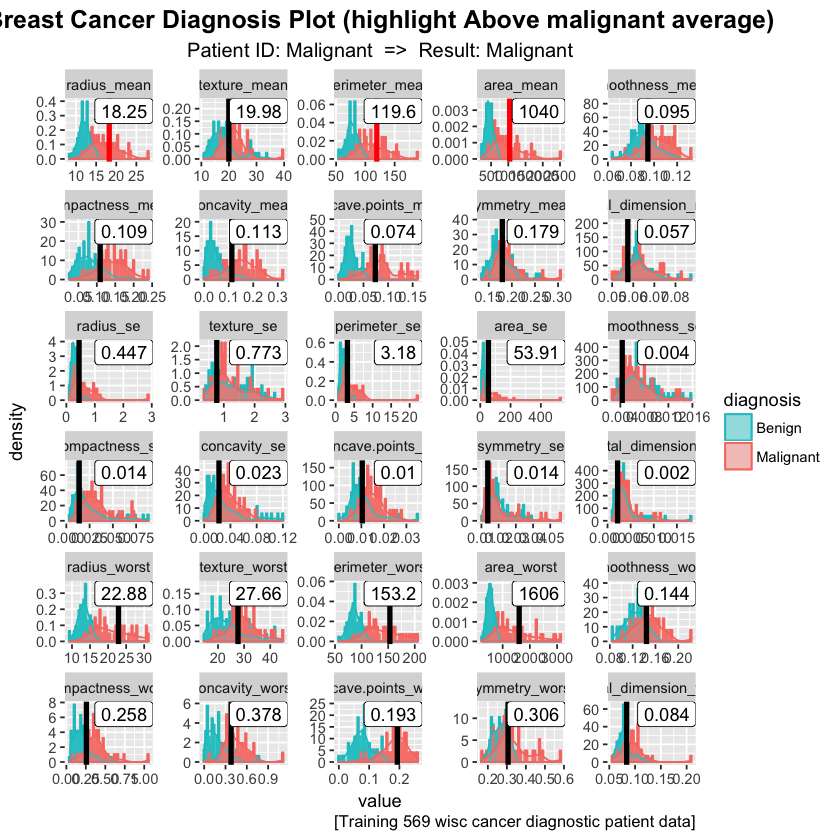

In [282]:
# Malignant
cancer_summary(test_malignant, test)

No id variables; using all as measure variables


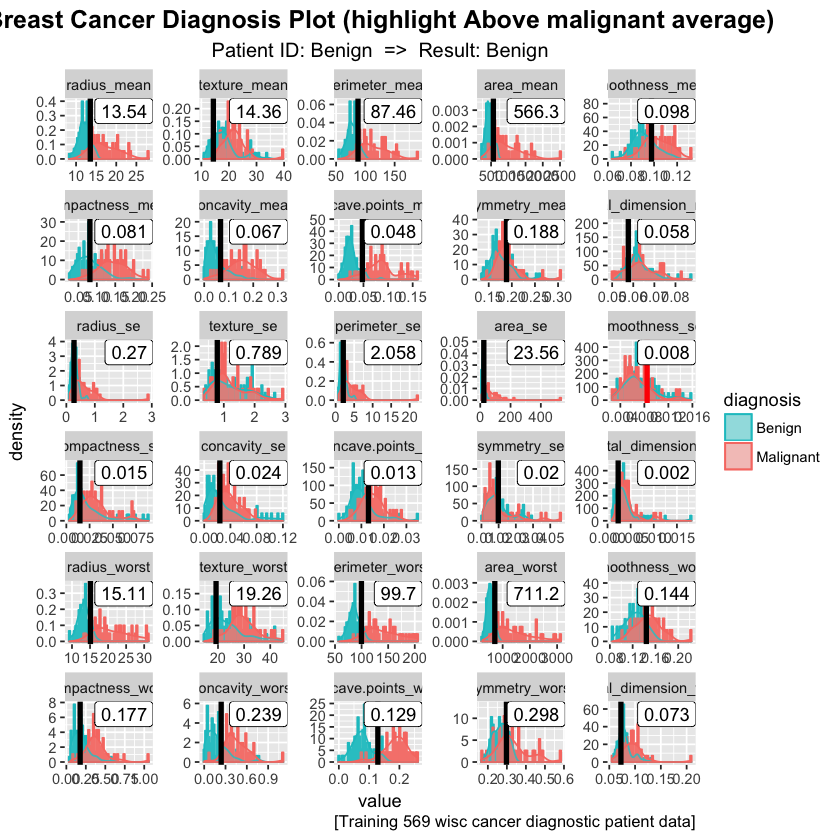

In [283]:
cancer_summary(test_benign, test)

## Radar Visualisation for Benign and Malignant

In [284]:
cancer_radar <- function(new,data) {

coord_radar <- function (theta = "x", start = 0, direction = 1) 
{
        theta <- match.arg(theta, c("x", "y"))
        r <- ifelse(theta == "x", "y", "x")
        ggproto("CoordRadar", CoordPolar, theta = theta, r = r, start = start, 
                direction = sign(direction),
                is_linear = function(coord) TRUE)
}

normalize <- function(x) {
    return((x-min(x))/(max(x)-min(x)))
}

b1 <- subset(data, diagnosis=="Benign", select=-1)
b2 <- as.data.frame(lapply(b1,normalize))           
be <- colMeans(b2)

p_new <- (new[,-1]-apply(b1,2,min))/(apply(b1,2,max)-apply(b1,2,min))
max_value <- max(p_new)

cc_radar <- rbind(be,p_new)
cc_radar <- cbind(group=c("Normal","Patient"),cc_radar)

coc <- melt(cc_radar, id="group")

coc$variable <- as.character(coc$variable)
coc$variable[str_count(coc$variable,'\\_')>1] <- sub('_', '.', coc$variable[str_count(coc$variable,'\\_')>1])
name <- unlist(strsplit(as.character(coc$variable),"_"))

coc$feature <- name[c(seq(1,length(name),2))]
coc$type <- name[c(seq(2,length(name),2))]  
coc$variable <- NULL

df <- coc[order(coc$feature),]
title <- "Breast Cancer Diagnosis Radar"
subtitle <- cancer_diagnosis_predict(new)

res <- ggplot(df, aes(x=feature,y=value,group=group,fill=group,color=group))+
    geom_point()+geom_polygon(alpha=0.3)+coord_radar()+ylim(0,max_value)+
    scale_color_manual(values=c(NA,"#b10000"))+
    scale_fill_manual(values=c("#8e8e8e",NA))+
    facet_wrap(~type)+
    theme(panel.background=element_rect(fill = "white", colour= NA),
          panel.border=element_rect(fill = NA, colour="grey50"), 
          panel.grid.major=element_line(colour = "grey90", size = 0.2),
          panel.grid.minor=element_line(colour = "grey98", size = 0.5),
          legend.position="bottom",
          strip.background =  element_rect(fill = "grey80", colour = "grey50"),
          axis.text.y=element_text(colour=NA),
          axis.title.y=element_text(colour=NA),
          axis.ticks=element_line(colour = NA))+
          xlab("")+ylab("")+
    labs(title=title, subtitle=subtitle)+
    theme(plot.title = element_text(face='bold', colour='black', hjust=0.5, size=15))+
    theme(plot.subtitle=element_text(lineheight=0.8, hjust=0.5, size=12))+
    labs(caption="[Training wisc cancer diagnostic patient data]")

res
}

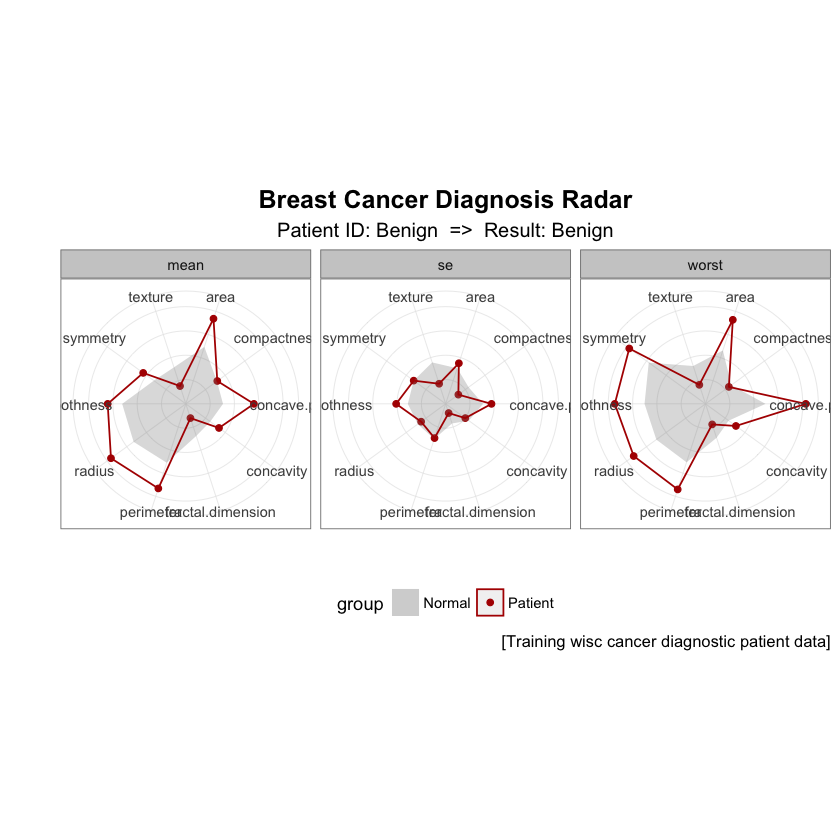

In [285]:
#Benign
cancer_radar(test_benign, test)

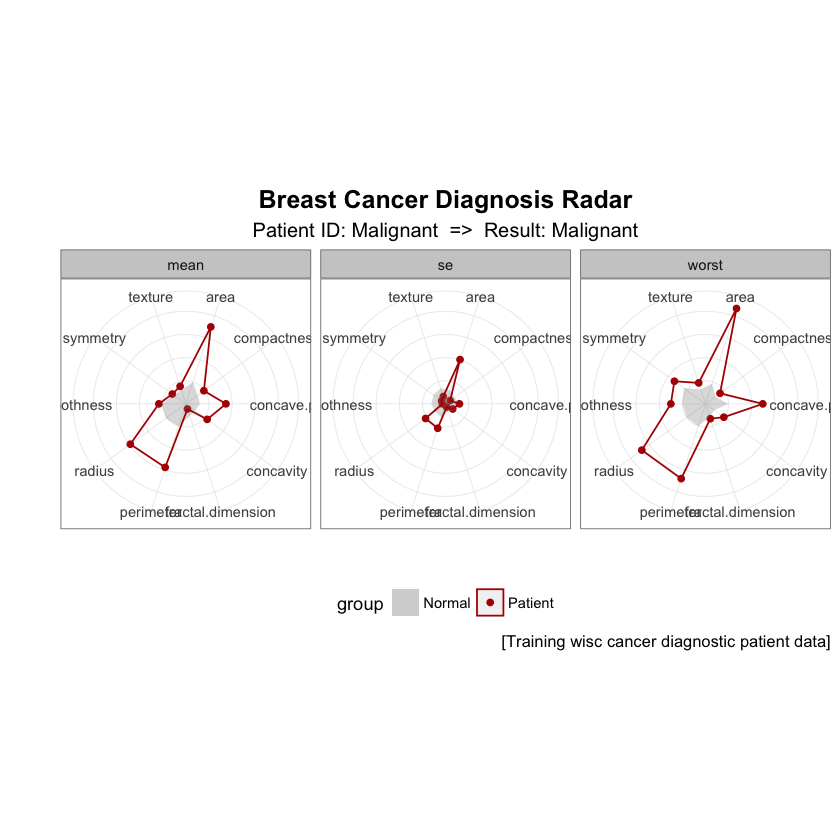

In [286]:
#Malignant
cancer_radar(test_malignant, test)